## Introduction

The given dataset is used to analyse the top 10 orders in terms of shipment quantity and shipment volumn. Moreover, the dataset is used to conduct indepth regional analysis and vendor analysis to understand the key markets and vendors

In [283]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display

In [284]:
# Viewpoint Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 30)
#pd.set_option('display.float_format', lambda x: '%.4f' % x)
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%precision 4

'%.4f'

## 1. Getting the Understanding of Data

### 1.1 Shape, Size and Value Labels of Data

In [ ]:
# Importing the dataset
df = pd.read_excel('DS Use Case.xlsx', sheet_name='Case study DS')

In [255]:
print(df.shape)
df.head(10)

(19449, 35)


,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,PEAM Code,GPP SBU,SBU Desc,GLB Source of Supply,SOS Desc,GLB Preferred Vendor,Vendor Desc,GPP Category,Category Desc,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2021 Forecast-Qty,2021 Forecast -GSV,2022 Forecast-Qty,2022 Forecast -GSV,log_2020 Shipment -Qty,log_2020 Shipment -GSV,log_2021 Forecast-Qty,log_2021 Forecast -GSV,log_2022 Forecast-Qty,log_2022 Forecast -GSV
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,"40,468.00","219,741.24","41,508.00","225,389.53","78,336.00","425,363.21",10.67,12.43,10.68,12.50,11.28,12.97
1,USA,USA,0020,US,USA,AMAZON,15557,10 PC DRILL BIT SET,D,D,D,IND,INDUSTRIAL SOLUTIONS,NO_SOURCE,NO_SOURCE,NO_SOURCE,NO_SOURCE,404,METAL DRILLING,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR,"-1,407.00","-4,643.10",NaN,NaN,NaN,NaN,6.91,10.12,NaN,NaN,NaN,NaN
2,USA,USA,0020,US,USA,RGMASS,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,"1,305.00","7,660.35",536.00,"3,147.09",225.00,"1,320.14",8.22,10.52,7.79,10.75,7.22,8.24
3,USA,USA,0020,US,USA,ACE,BDA46SDDD,46PC SCREWDRIVING / DRILL,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,780.00,"9,516.00",471.00,"5,623.91",645.00,"7,710.36",8.07,10.57,7.76,10.81,7.49,9.23
4,USA,USA,0020,US,USA,RW,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,NaN,NaN,292.00,"1,783.55",413.00,"2,517.28",NaN,NaN,7.68,10.72,7.35,8.51
5,USA,USA,0020,US,USA,ICFLD,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,218.00,"1,428.16",224.00,"1,163.23",50.00,149.32,7.87,10.34,7.65,10.71,7.08,7.87
6,USA,USA,0020,US,USA,AMAZON,BDA46SDDD,46PC SCREWDRIVING / DRILL,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,"3,252.00","27,663.99",64.00,542.72,0.00,0.00,8.64,10.95,7.57,10.70,7.04,7.81
7,USA,USA,0020,US,USA,AMAZON,BDA32IRDD,32PC IMPACT READY SCREWDR,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,533.00,"6,060.21",7.00,79.59,0.00,0.00,7.99,10.48,7.54,10.69,7.04,7.81
8,USA,USA,0020,US,USA,RGMASS,HHVJ320BMF61,GEN 10 HV 2AH TIT OCEAN B,C,C,C,HPG,HOME PRODUCTS GROUP,NO_SOURCE,NO_SOURCE,NO_SOURCE,NO_SOURCE,351,CORDLESS HOME PRODUC,18,HOME PRODUCTS (HPG),43012,MPP CORDLESS HAND VA,-199.00,"-11,725.08",NaN,NaN,0.00,0.00,7.70,9.78,NaN,NaN,7.04,7.81
9,USA,USA,0020,US,USA,RW,BDA32IRDD,32PC IMPACT READY SCREWDR,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,5.00,74.05,NaN,NaN,NaN,NaN,7.79,10.29,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

GIP Region                  object
Region Desc                 object
Sales Organization          object
Sales Organisation Desc     object
Dmd - Global Region         object
Demand Group                object
Global Material             object
Material Desc               object
PMAN ABC Code               object
PEAM ABC Code               object
PEAM Code                   object
GPP SBU                     object
SBU Desc                    object
GLB Source of Supply        object
SOS Desc                    object
GLB Preferred Vendor        object
Vendor Desc                 object
GPP Category                object
Category Desc               object
GPP Division                 int64
Division Desc               object
GPP Portfolio               object
Portfolio Desc              object
2020 Shipment -Qty         float64
2020 Shipment -GSV         float64
2021 Forecast-Qty          float64
2021 Forecast -GSV         float64
2022 Forecast-Qty           object
2022 Forecast -GSV  

It can be seen that 2022 Forcast GSV and 2022 Forecast -Qty are set as strings, the reason can be '-' in these two features. It will be better to check for other characters such as '$' or any other string characters before converting them to numeric features. Further it is also observed that GPP Division is stored as Integer, which can be a qualitative feature.

In [7]:
import re

charset = []
cols = ['2022 Forecast-Qty', '2022 Forecast -GSV'] 
for col in cols: 
    for i in df[col]:
        if not re.search(r'[^0-9.]', str(i)) == None:
            char = re.search(r'[^0-9.]', str(i)).group()
            if char not in charset:
                charset.append(char)
print(charset)

['-']


In [8]:
# Converting the strings columns to numeric
df['2022 Forecast-Qty'] = pd.to_numeric(df['2022 Forecast-Qty'], errors='coerce')
df['2022 Forecast -GSV'] = pd.to_numeric(df['2022 Forecast -GSV'], errors = 'coerce')

In [9]:
df.head(2)

,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,PEAM Code,GPP SBU,SBU Desc,GLB Source of Supply,SOS Desc,GLB Preferred Vendor,Vendor Desc,GPP Category,Category Desc,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2021 Forecast-Qty,2021 Forecast -GSV,2022 Forecast-Qty,2022 Forecast -GSV
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,40468.0000,219741.2400,41508.0000,225389.5300,78336.0000,425363.2100
1,USA,USA,0020,US,USA,AMAZON,15557,10 PC DRILL BIT SET,D,D,D,IND,INDUSTRIAL SOLUTIONS,NO_SOURCE,NO_SOURCE,NO_SOURCE,NO_SOURCE,404,METAL DRILLING,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR,-1407.0000,-4643.1000,NaN,NaN,NaN,NaN


In [10]:
print(df['GPP Division'].describe(),
      '\nunique values: ', df['GPP Division'].unique())

count   19449.0000
mean       15.1584
std         8.4156
min         1.0000
25%        10.0000
50%        10.0000
75%        18.0000
max        70.0000
Name: GPP Division, dtype: float64 
unique values:  [30 34 18 10  2  1  4  7 22  3 17 21 23 36 70]


GPP Division appears to be a qualitative feature

In [11]:
# Converting GPP Division feature to strings
df['GPP Division'] = df['GPP Division'].astype(str)

In [12]:
# Checking the type of columns after type conversion
df[['GPP Division', '2022 Forecast-Qty', '2022 Forecast -GSV']].dtypes

GPP Division           object
2022 Forecast-Qty     float64
2022 Forecast -GSV    float64
dtype: object

In [13]:
for col in df.columns:
    if df[col].dtypes == 'object': 
        print(col, f"-- Unique Values : {df[col].describe()['unique']}")

GIP Region -- Unique Values : 11
Region Desc -- Unique Values : 11
Sales Organization -- Unique Values : 13
Sales Organisation Desc -- Unique Values : 13
Dmd - Global Region -- Unique Values : 7
Demand Group -- Unique Values : 189
Global Material -- Unique Values : 3351
Material Desc -- Unique Values : 2618
PMAN ABC Code -- Unique Values : 4
PEAM ABC Code -- Unique Values : 4
PEAM Code -- Unique Values : 4
GPP SBU -- Unique Values : 8
SBU Desc -- Unique Values : 8
GLB Source of Supply -- Unique Values : 19
SOS Desc -- Unique Values : 19
GLB Preferred Vendor -- Unique Values : 154
Vendor Desc -- Unique Values : 147
GPP Category -- Unique Values : 72
Category Desc -- Unique Values : 68
GPP Division -- Unique Values : 15
Division Desc -- Unique Values : 15
GPP Portfolio -- Unique Values : 170
Portfolio Desc -- Unique Values : 162


In [14]:
colsUniqueVal = pd.DataFrame()
for col in df.columns:
    if df[col].dtypes == 'object':
        tempDict = {col : df[col].unique()}
        tempDF = pd.DataFrame(tempDict, columns = [col])
        colsUniqueVal = pd.concat([colsUniqueVal, tempDF], axis = 1)

In [256]:
colsUniqueVal.head(5)

,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,PEAM Code,GPP SBU,SBU Desc,GLB Source of Supply,SOS Desc,GLB Preferred Vendor,Vendor Desc,GPP Category,Category Desc,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING
1,LAG,Latin America,AR,ARGENTINA,Not assigned,RGMASS,15557,10 PC DRILL BIT SET,D,D,D,IND,INDUSTRIAL SOLUTIONS,NO_SOURCE,NO_SOURCE,NO_SOURCE,NO_SOURCE,404,METAL DRILLING,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR
2,USA-FOB,USA FOB,3003,3003,LAG,ACE,BDA46SDDD,46PC SCREWDRIVING / DRILL,B,B,B,HPG,HOME PRODUCTS GROUP,806,GSMA,20007606,VRONG YIH,351,CORDLESS HOME PRODUC,18,HOME PRODUCTS (HPG),47130,COMBINATION SETS
3,EMG,EMG,CH,CHILE,EMG,RW,BDA32IRDD,32PC IMPACT READY SCREWDR,A,A,A,CPT,CONS POWER TOOLS,720,SEDALIA MFG,20019311,NINGBO FUJIA INDUSTR,255,CORDED SANDERS,10,CONSUMER (CPT),43012,MPP CORDLESS HAND VA
4,CDN,Canada,PE,PERU,CDN,ICFLD,HHVJ320BMF61,GEN 10 HV 2AH TIT OCEAN B,NaN,NaN,NaN,AIS,AUTOMOTIVE & INDUSTR,764,THAILAND MFG,20010721,VSUN,271,CORDLESS EXPANSION,2,RETAIL METAL STORAGE,43013,HPP CORDLESS HAND VA


### 1.2 Finding the proportion of Missing Values 

2020 Shipment -Qty Missing Values (%age): 25.287
2020 Shipment -GSV Missing Values (%age): 25.287
2021 Forecast-Qty Missing Values (%age): 33.889
2021 Forecast -GSV Missing Values (%age): 33.889
2022 Forecast-Qty Missing Values (%age): 3.039
2022 Forecast -GSV Missing Values (%age): 3.039
log_2020 Shipment -Qty Missing Values (%age): 25.287
log_2020 Shipment -GSV Missing Values (%age): 25.287
log_2021 Forecast-Qty Missing Values (%age): 33.889
log_2021 Forecast -GSV Missing Values (%age): 33.889
log_2022 Forecast-Qty Missing Values (%age): 3.039
log_2022 Forecast -GSV Missing Values (%age): 3.039


<AxesSubplot:>

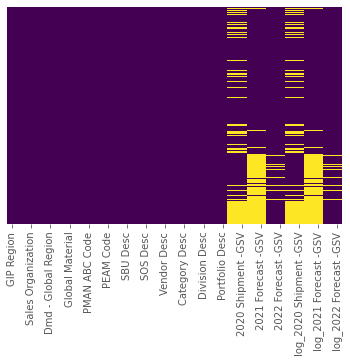

In [154]:
for col in df.columns:
    if df[col].isna().sum() != 0:
       print(col, f"Missing Values (%age): {df[col].isna().sum()/len(df)*100:.3f}")
sns.heatmap(data=df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

It can be seen that significant amount of quantitative data is missing. Before formulating a strategy to replace the missing data, it is neccessary to analyse data further. Moreover, heatmap also demonstrates that for each year the data is missing for same rows for both GSV and Qty columns.

## 2. Exploratory Data Analysis

### 2.1 Analysing Distribution of Categorical Data

In [554]:
# Bar Plots and Frequency Distribution for Categorical Variable
def freqDist(df, col, drop = True):
    if drop == True:
        df = df.dropna()
    else:
        df = df
    dfCat = df[col].value_counts().reset_index()
    dfCat["%age"] = dfCat[col]/dfCat[col].sum()
    dfCat.rename(columns = {"index" : col, col : "Frequency"}, inplace = True)
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    if len(dfCat) <= 20:
        print(f"\n########## Frequency Distribution of {col} ##########\n")
        display(dfCat)
        sns.barplot(x="%age", y=col, data=dfCat, orient = "h")
        plt.show()
    else:
        print(f"\n########## Frequency Distribution for TOP 20 Category of {col} ##########\n")
        display(dfCat.loc[:20])
        sns.barplot(x="%age", y=col, data=dfCat.loc[:20], orient = "h")
        plt.show()


########## Frequency Distribution of Region Desc ##########



,Region Desc,Frequency,%age
0,EU,3041,0.30
1,Latin America,2549,0.25
2,USA,1537,0.15
3,EMG,1460,0.14
4,Asia Markets only,1041,0.10
5,Canada,336,0.03
6,Not assigned,110,0.01
7,Australia & New Zealand,108,0.01
8,USA FOB,8,0.00


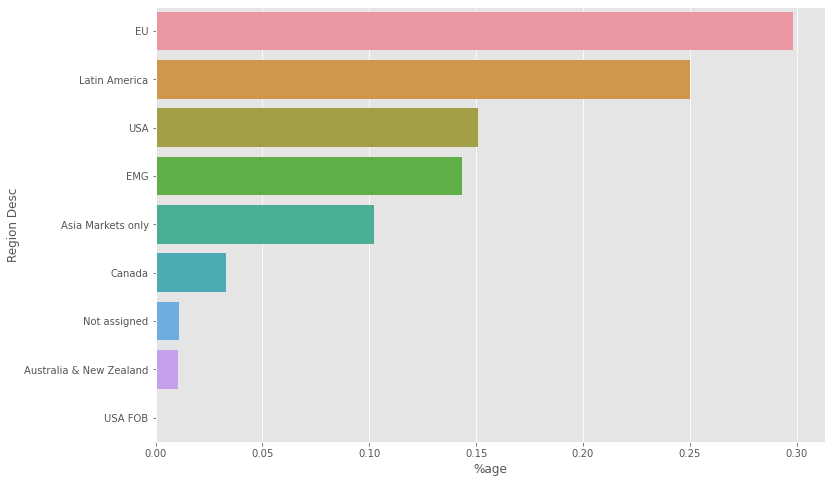

In [555]:
freqDist(df, "Region Desc")


########## Frequency Distribution of Sales Organisation Desc ##########



,Sales Organisation Desc,Frequency,%age
0,EMEA,5650,0.55
1,US,1545,0.15
2,BRAZIL,1156,0.11
3,CHILE,361,0.04
4,CANADA,336,0.03
5,3003,314,0.03
6,ARGENTINA,291,0.03
7,MR,212,0.02
8,Not assigned,132,0.01
9,COLOMBIA,111,0.01


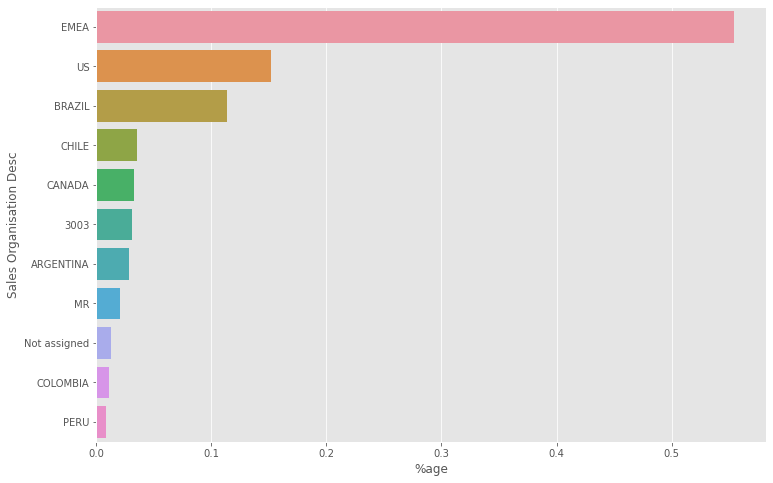

In [556]:
freqDist(df, "Sales Organisation Desc")


########## Frequency Distribution of PEAM Code ##########



,PEAM Code,Frequency,%age
0,C,6592,0.65
1,A,1874,0.18
2,B,1149,0.11
3,D,575,0.06


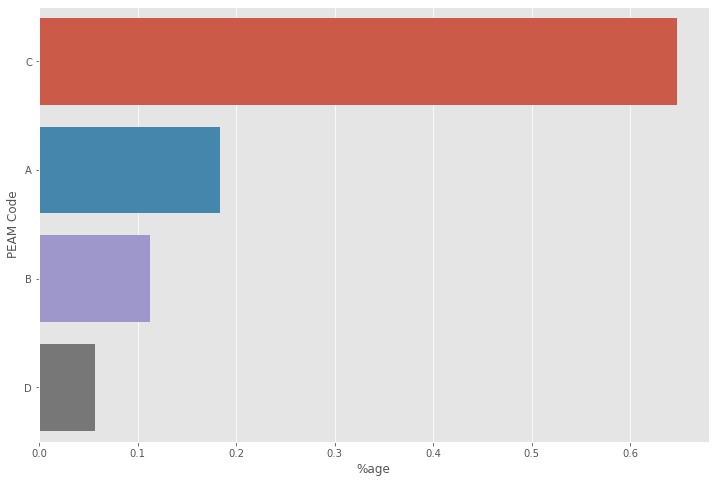

In [557]:
freqDist(df, "PEAM Code")


########## Frequency Distribution of PEAM ABC Code ##########



,PEAM ABC Code,Frequency,%age
0,C,6592,0.65
1,A,1874,0.18
2,B,1149,0.11
3,D,575,0.06


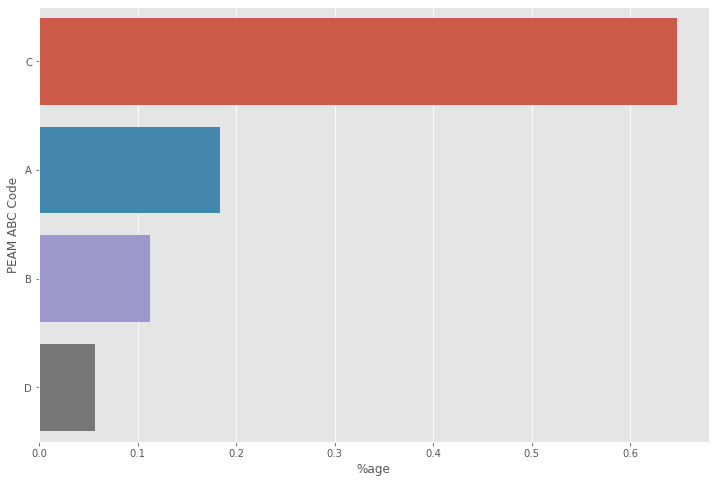

In [558]:
freqDist(df, "PEAM ABC Code")


########## Frequency Distribution of PMAN ABC Code ##########



,PMAN ABC Code,Frequency,%age
0,C,6592,0.65
1,A,1874,0.18
2,B,1149,0.11
3,D,575,0.06


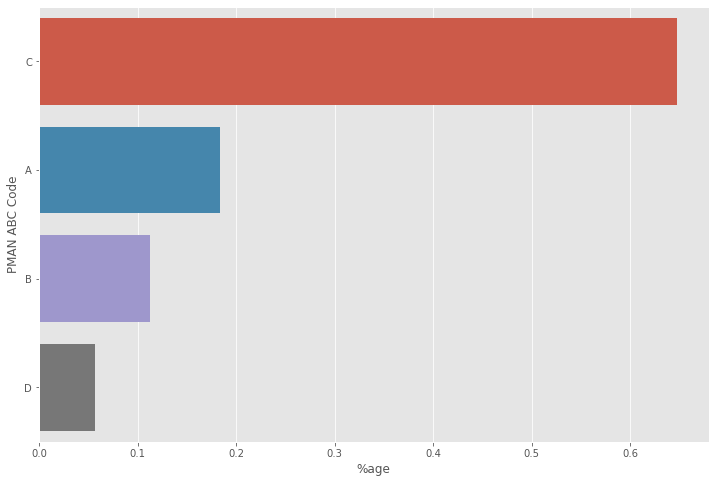

In [559]:
freqDist(df, "PMAN ABC Code")


########## Frequency Distribution of SBU Desc ##########



,SBU Desc,Frequency,%age
0,CONS POWER TOOLS,5297,0.52
1,HOME PRODUCTS GROUP,2496,0.24
2,CONSTRUCTION SOLUTIO,1480,0.15
3,INDUSTRIAL SOLUTIONS,576,0.06
4,AUTOMOTIVE & INDUSTR,320,0.03
5,PROF POWER TOOLS,21,0.00


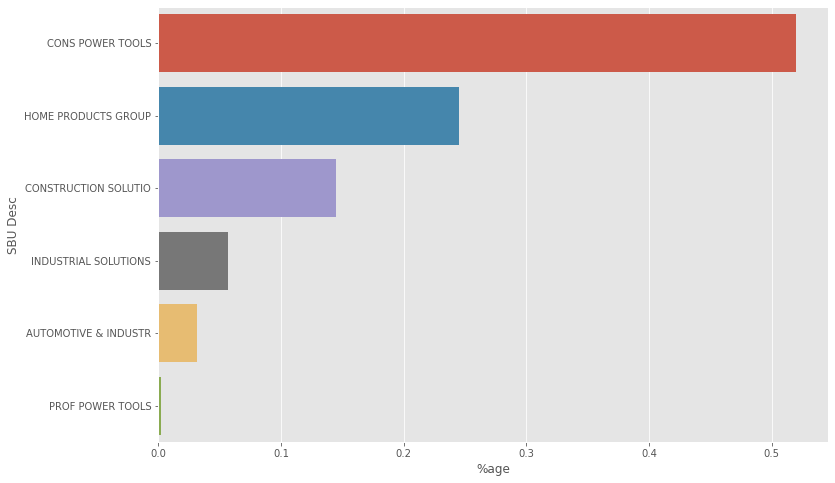

In [560]:
freqDist(df, "SBU Desc")


########## Frequency Distribution of SOS Desc ##########



,SOS Desc,Frequency,%age
0,SUZHOU CPT,5339,0.52
1,GSMA,3913,0.38
2,MULTIPLE,728,0.07
3,NO_SOURCE,62,0.01
4,PURCH-3PTY,48,0.00
5,DC_KITTING,31,0.00
6,SHELBYVILLE,23,0.00
7,SUZHOU PPT/PTA,22,0.00
8,V958 GUOQIANG MFG PLANT,6,0.00
9,SUZHOU SB,6,0.00


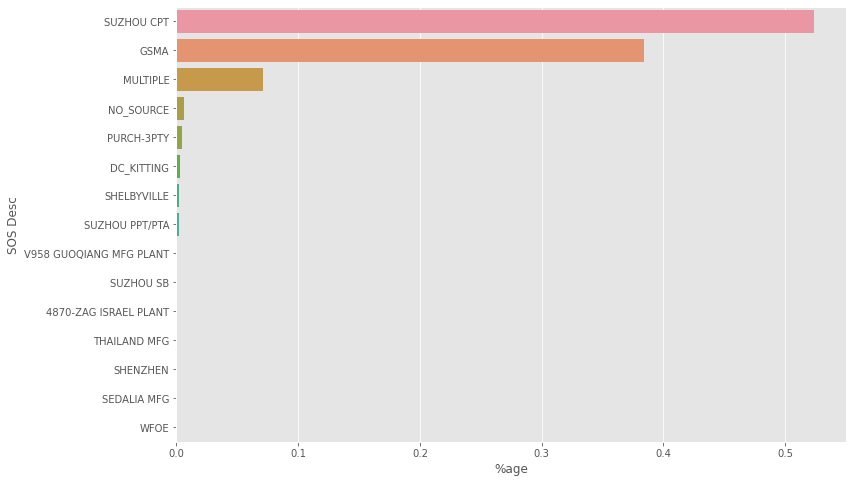

In [561]:
freqDist(df, "SOS Desc")


########## Frequency Distribution for TOP 20 Category of Vendor Desc ##########



,Vendor Desc,Frequency,%age
0,SUZHOU CPT,5339,0.52
1,MULTIPLE,728,0.07
2,ZHEJIANG HUAFENG ELE,310,0.03
3,VPRULDE,233,0.02
4,JINDING GROUP CO LTD,221,0.02
5,GUANG DONG XINBAO EL,217,0.02
6,SHAOXING HUAYUE TOOL,215,0.02
7,ZHEJIANG YIDA ELECTR,178,0.02
8,VGUEX,175,0.02
9,VRONGSHENG,131,0.01


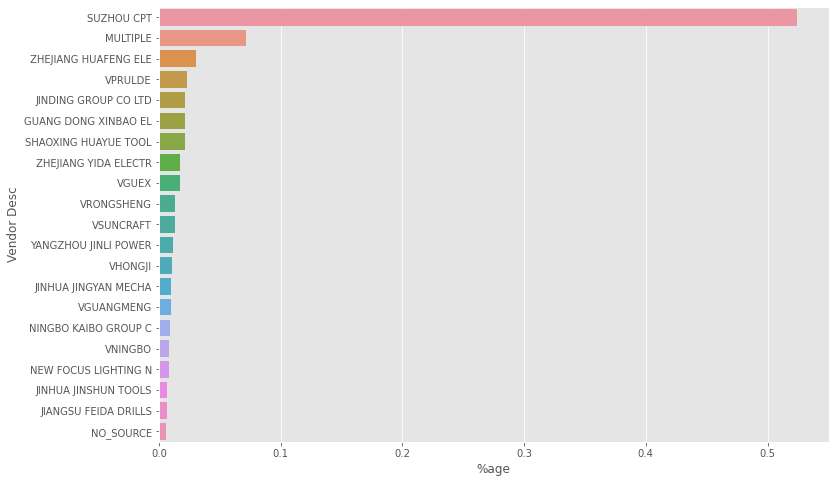

In [562]:
freqDist(df, "Vendor Desc")


########## Frequency Distribution for TOP 20 Category of Category Desc ##########



,Category Desc,Frequency,%age
0,CORDLESS HOME PRODUC,1130,0.11
1,CORDLESS DRILLS,923,0.09
2,FASTENING,708,0.07
3,SMALL DOMESTIC APPLI,651,0.06
4,CORDLESS EXPANSION,518,0.05
5,CORDED OTHER,483,0.05
6,CORDLESS SCREWDRIVER,438,0.04
7,SPECIALTY,423,0.04
8,CORDED SAWS,411,0.04
9,CORDLESS COMBO KITS,401,0.04


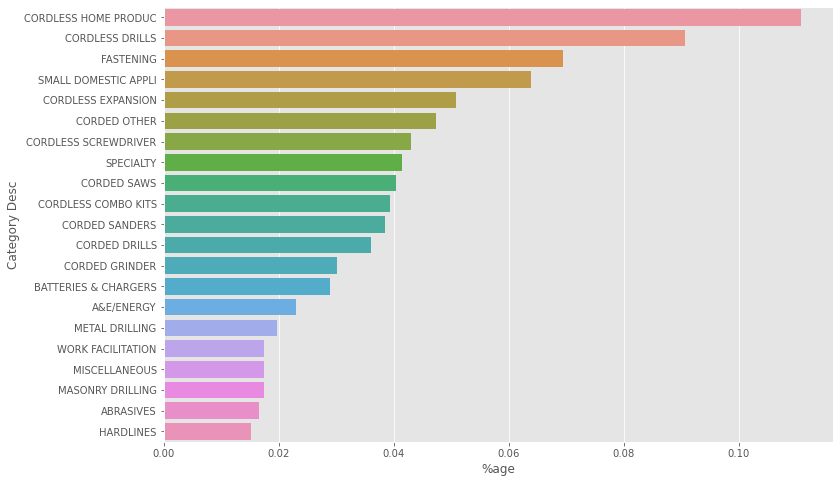

In [563]:
freqDist(df, "Category Desc")


########## Frequency Distribution of Division Desc ##########



,Division Desc,Frequency,%age
0,CONSUMER (CPT),5057,0.50
1,HOME PRODUCTS (HPG),2496,0.24
2,CONSTRUCTION ACCESSO,1005,0.10
3,COMMERCIAL ACCESSORI,576,0.06
4,MECH& AUTO TOOLS (AI,319,0.03
5,HAND TOOLS (CTS),291,0.03
6,PORTABLE STORAGE (CT,184,0.02
7,TRADESMAN (CPT),121,0.01
8,AUTO & ELEC (CPT),119,0.01
9,DF & ES (PPT),11,0.00


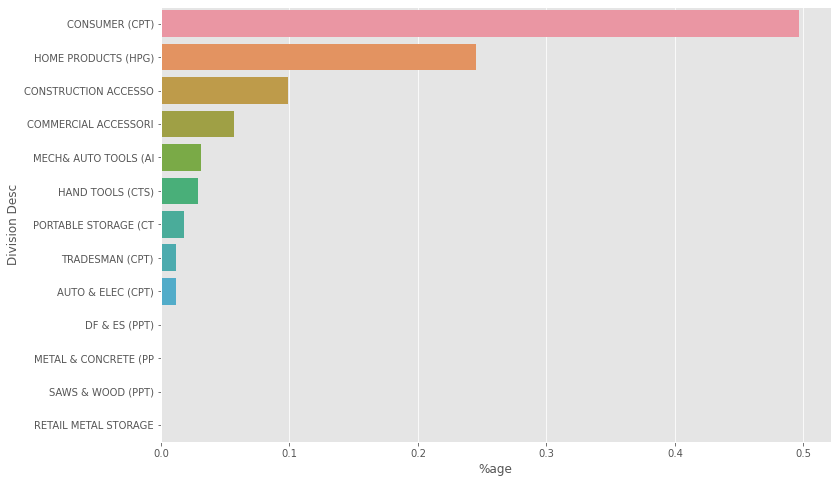

In [564]:
freqDist(df, "Division Desc")


########## Frequency Distribution for TOP 20 Category of Portfolio Desc ##########



,Portfolio Desc,Frequency,%age
0,COMBINATION SETS,651,0.06
1,CDLS DRILLS,603,0.06
2,STD.CDLS.SCREWDRIVRS,438,0.04
3,CORDLESS COMBO KITS,401,0.04
4,EPP CORDLESS HAND VA,379,0.04
5,OTHER EXPANSION,321,0.03
6,GRINDERS,307,0.03
7,BATTERIES & CHARGERS,284,0.03
8,MPP CORDLESS HAND VA,268,0.03
9,SPECIALTY,265,0.03


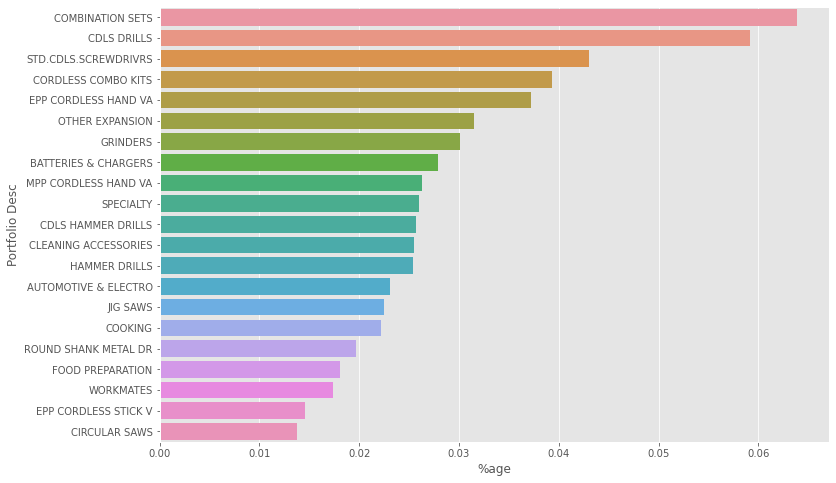

In [565]:
freqDist(df, "Portfolio Desc")

### 2.2 Analysing Summary Statistics of Quantitative Data

In [17]:
# Summary Statistics for each quantitative column
df.describe()

,2020 Shipment -Qty,2020 Shipment -GSV,2021 Forecast-Qty,2021 Forecast -GSV,2022 Forecast-Qty,2022 Forecast -GSV
count,14531.0000,14531.0000,12858.0000,12858.0000,18858.0000,18858.0000
mean,1399.8061,40939.7742,1980.3390,62919.2104,1218.4799,38293.4103
std,11077.4493,270294.2373,10571.8441,334521.2571,9067.9981,268582.8822
min,-1407.0000,-28450.4500,-871.0000,-42680.7400,-143.0000,-1469.9400
25%,17.0000,333.1850,29.0000,543.1600,0.0000,0.0000
50%,120.0000,2646.5800,200.0000,4373.0200,0.0000,0.0000
75%,604.0000,17161.1500,986.0000,27722.7300,237.7500,5107.9100
max,818900.0000,16595293.4400,386715.0000,14587302.5800,480000.0000,10595658.6600


#### 2.2.1 Conducting Log Transformation

In [37]:
quantCols = ["2020 Shipment -Qty", "2020 Shipment -GSV", "2021 Forecast-Qty",
             "2021 Forecast -GSV", "2022 Forecast-Qty", "2022 Forecast -GSV"]

for col in quantCols:
    df[f"log_{col}"] = np.log(df[col] - min(df[col]) + 1000)

In [38]:
df.head()

,GIP Region,Region Desc,Sales Organization,Sales Organisation Desc,Dmd - Global Region,Demand Group,Global Material,Material Desc,PMAN ABC Code,PEAM ABC Code,PEAM Code,GPP SBU,SBU Desc,GLB Source of Supply,SOS Desc,GLB Preferred Vendor,Vendor Desc,GPP Category,Category Desc,GPP Division,Division Desc,GPP Portfolio,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2021 Forecast-Qty,2021 Forecast -GSV,2022 Forecast-Qty,2022 Forecast -GSV,log_2020 Shipment -Qty,log_2020 Shipment -GSV,log_2021 Forecast-Qty,log_2021 Forecast -GSV,log_2022 Forecast-Qty,log_2022 Forecast -GSV
0,USA,USA,0020,US,USA,AMAZON,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,40468.0000,219741.2400,41508.0000,225389.5300,78336.0000,425363.2100,10.6660,12.4260,10.6777,12.5027,11.2832,12.9665
1,USA,USA,0020,US,USA,AMAZON,15557,10 PC DRILL BIT SET,D,D,D,IND,INDUSTRIAL SOLUTIONS,NO_SOURCE,NO_SOURCE,NO_SOURCE,NO_SOURCE,404,METAL DRILLING,34,COMMERCIAL ACCESSORI,47110,ROUND SHANK METAL DR,-1407.0000,-4643.1000,NaN,NaN,NaN,NaN,6.9078,10.1189,NaN,NaN,NaN,NaN
2,USA,USA,0020,US,USA,RGMASS,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,1305.0000,7660.3500,536.0000,3147.0900,225.0000,1320.1400,8.2193,10.5217,7.7861,10.7542,7.2211,8.2401
3,USA,USA,0020,US,USA,ACE,BDA46SDDD,46PC SCREWDRIVING / DRILL,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,47130,COMBINATION SETS,780.0000,9516.0000,471.0000,5623.9100,645.0000,7710.3600,8.0668,10.5705,7.7588,10.8058,7.4889,9.2282
4,USA,USA,0020,US,USA,RW,BDA42SD,42PC SCREWDRIVING SET,C,C,C,CTS,CONSTRUCTION SOLUTIO,954,SUZHOU CPT,954,SUZHOU CPT,401,FASTENING,30,CONSTRUCTION ACCESSO,81600,CONSUMER FASTENING,NaN,NaN,292.0000,1783.5500,413.0000,2517.2800,NaN,NaN,7.6793,10.7247,7.3499,8.5146


### 2.3 Top 10 Analysis for Shipment Quantity and Shipment 

In [624]:
def top10Analysis(df, x, y, scatter = True):
    cols = ["Region Desc", "Sales Organisation Desc", "Demand Group", "PEAM Code", "SBU Desc", "SOS Desc", "Vendor Desc",
            "Category Desc", "Division Desc", "Portfolio Desc", x, y]
    for i in [x,y]:
        if i == x:
            analysis = "Shipment Quantity"
        elif i == y:
            analysis = "Shipment GSV"
        print(f"\n ################ Top 10 Analysis on the basis of {analysis} ################ \n")
        dfTopShipment = df.loc[df[i].sort_values(ascending = False)[:10].index,cols]
        dfTopShipment.reset_index(inplace = True, drop = True)
        print(f"Highest {i}")
        print(dfTopShipment.loc[0].to_string())
        topShipPerc = dfTopShipment[x].sum()/df[x].sum()
        topShipVal = dfTopShipment[y].sum()
        print(f"\nContribution of total shipment gsv under Top 10 {i} in overall {y} : {(topShipVal/df[y].sum())*100:.3f} %")
        print(f"Contribution of total shipment qty under Top 10 {i} in overall {x}: {topShipPerc*100:.3f} %")
        print(f"\nUnder Top 10 {analysis}: ... \n")
        for col in cols[:-2]:
            dfTopShipment_Cat = dfTopShipment[col].value_counts()
            topShipmentCat = dfTopShipment_Cat.index[0]
            topShipmentCatVal = dfTopShipment_Cat[0]
            dfCat = dfTopShipment.loc[dfTopShipment[col]==topShipmentCat].groupby(col).sum()
            dfCatQtyValPerc = dfCat.iloc[0,0]/dfTopShipment[x].sum()
            dfCatGSVPerc = dfCat.iloc[0,1]/topShipVal

            insight = (f"""   > The most observed {col} is {topShipmentCat} covering {topShipmentCatVal}/10 {analysis} which contributes 
        to {dfCatQtyValPerc*100:.3f}% to total shimpment qty and {dfCatGSVPerc*100:.3f}% to total shipment GSV of Top 10 {analysis}.""")
            print(insight)

    print(f"\n################## Scatterplot between {x} and {y} ##################")

    print(f"\n> {x} and {y} combination for extrement values \n")

    extreme = pd.concat([df.loc[df[x].sort_values(ascending = False)[:5].index,cols[-2:]], 
          df.loc[df[y].sort_values(ascending = False)[:5].index,cols[-2:]]])
    print(extreme)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    sns.scatterplot(data = df, x = x, y = y, hue = "Region Desc", s = 100)
    

#### 2.3.1 Qty and GSV anlaysis for year 2020


 ################ Top 10 Analysis on the basis of Shipment Quantity ################ 

Highest 2020 Shipment -Qty
Region Desc                       Latin America
Sales Organisation Desc               ARGENTINA
Demand Group                            AROTHER
PEAM Code                                     A
SBU Desc                   INDUSTRIAL SOLUTIONS
SOS Desc                                   GSMA
Vendor Desc                              VCUMET
Category Desc                         ABRASIVES
Division Desc              COMMERCIAL ACCESSORI
Portfolio Desc                 BONDED ABRASIVES
2020 Shipment -Qty                   818,900.00
2020 Shipment -GSV                   201,766.98

Contribution of total shipment gsv under Top 10 2020 Shipment -Qty in overall 2020 Shipment -GSV : 9.377 %
Contribution of total shipment qty under Top 10 2020 Shipment -Qty in overall 2020 Shipment -Qty: 16.209 %

Under Top 10 Shipment Quantity: ... 

   > The most observed Region Desc is USA covering 7/10

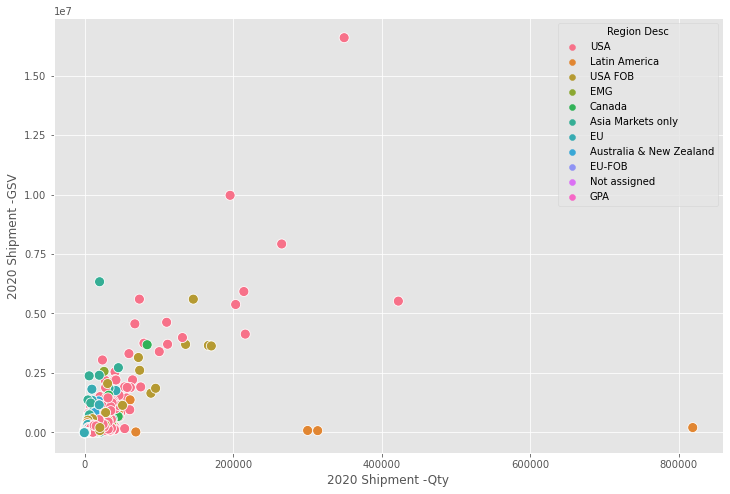

In [625]:
top10Analysis(df, "2020 Shipment -Qty", "2020 Shipment -GSV")

#### 2.3.2 Qty and GSV anlaysis for year 2021


 ################ Top 10 Analysis on the basis of Shipment Quantity ################ 

Highest 2021 Forecast-Qty
Region Desc                                 USA
Sales Organisation Desc                      US
Demand Group                            WALMART
PEAM Code                                     C
SBU Desc                    HOME PRODUCTS GROUP
SOS Desc                             SUZHOU CPT
Vendor Desc                          SUZHOU CPT
Category Desc              CORDLESS HOME PRODUC
Division Desc               HOME PRODUCTS (HPG)
Portfolio Desc             EPP CORDLESS HAND VA
2021 Forecast-Qty                    386,715.00
2021 Forecast -GSV                 5,170,379.55

Contribution of total shipment gsv under Top 10 2021 Forecast-Qty in overall 2021 Forecast -GSV : 6.585 %
Contribution of total shipment qty under Top 10 2021 Forecast-Qty in overall 2021 Forecast-Qty: 11.135 %

Under Top 10 Shipment Quantity: ... 

   > The most observed Region Desc is USA covering 7/10 Shi

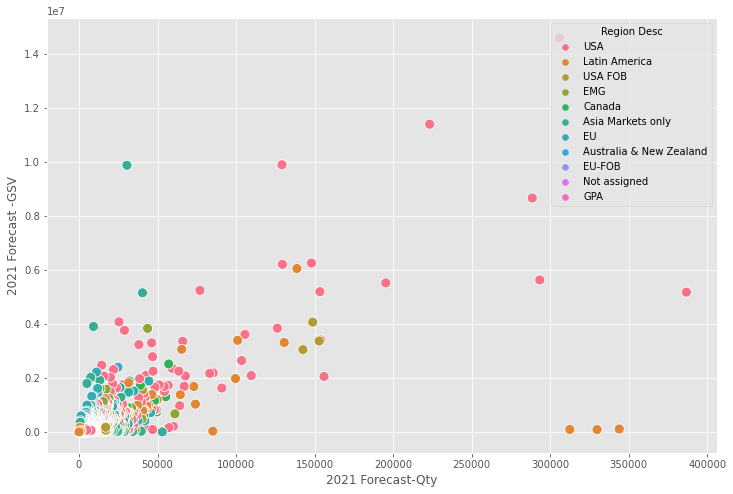

In [626]:
top10Analysis(df, "2021 Forecast-Qty", "2021 Forecast -GSV")

#### 2.3.3 Qty and GSV anlaysis for year 2022


 ################ Top 10 Analysis on the basis of Shipment Quantity ################ 

Highest 2022 Forecast-Qty
Region Desc                       Latin America
Sales Organisation Desc               ARGENTINA
Demand Group                            AROTHER
PEAM Code                                     A
SBU Desc                   INDUSTRIAL SOLUTIONS
SOS Desc                                   GSMA
Vendor Desc                              VCUMET
Category Desc                         ABRASIVES
Division Desc              COMMERCIAL ACCESSORI
Portfolio Desc                 BONDED ABRASIVES
2022 Forecast-Qty                    480,000.00
2022 Forecast -GSV                   167,040.00

Contribution of total shipment gsv under Top 10 2022 Forecast-Qty in overall 2022 Forecast -GSV : 6.625 %
Contribution of total shipment qty under Top 10 2022 Forecast-Qty in overall 2022 Forecast-Qty: 12.727 %

Under Top 10 Shipment Quantity: ... 

   > The most observed Region Desc is USA covering 6/10 Shi

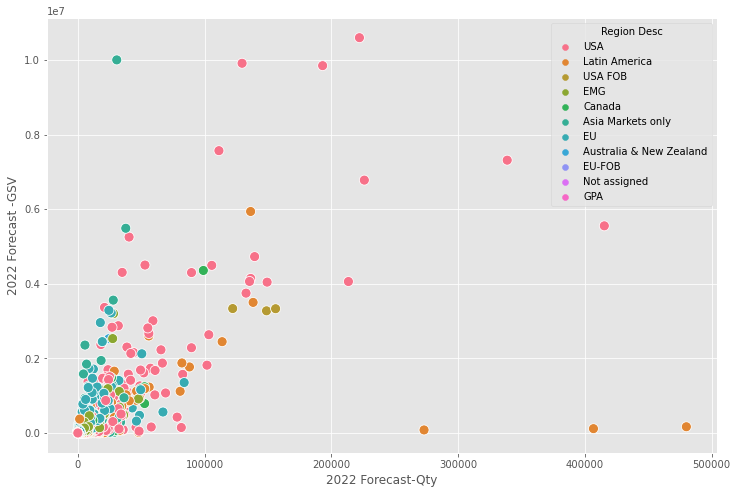

In [632]:
top10Analysis(df, "2022 Forecast-Qty", "2022 Forecast -GSV")

#### 2.3.3 Qty and GSV anlaysis for year 2022

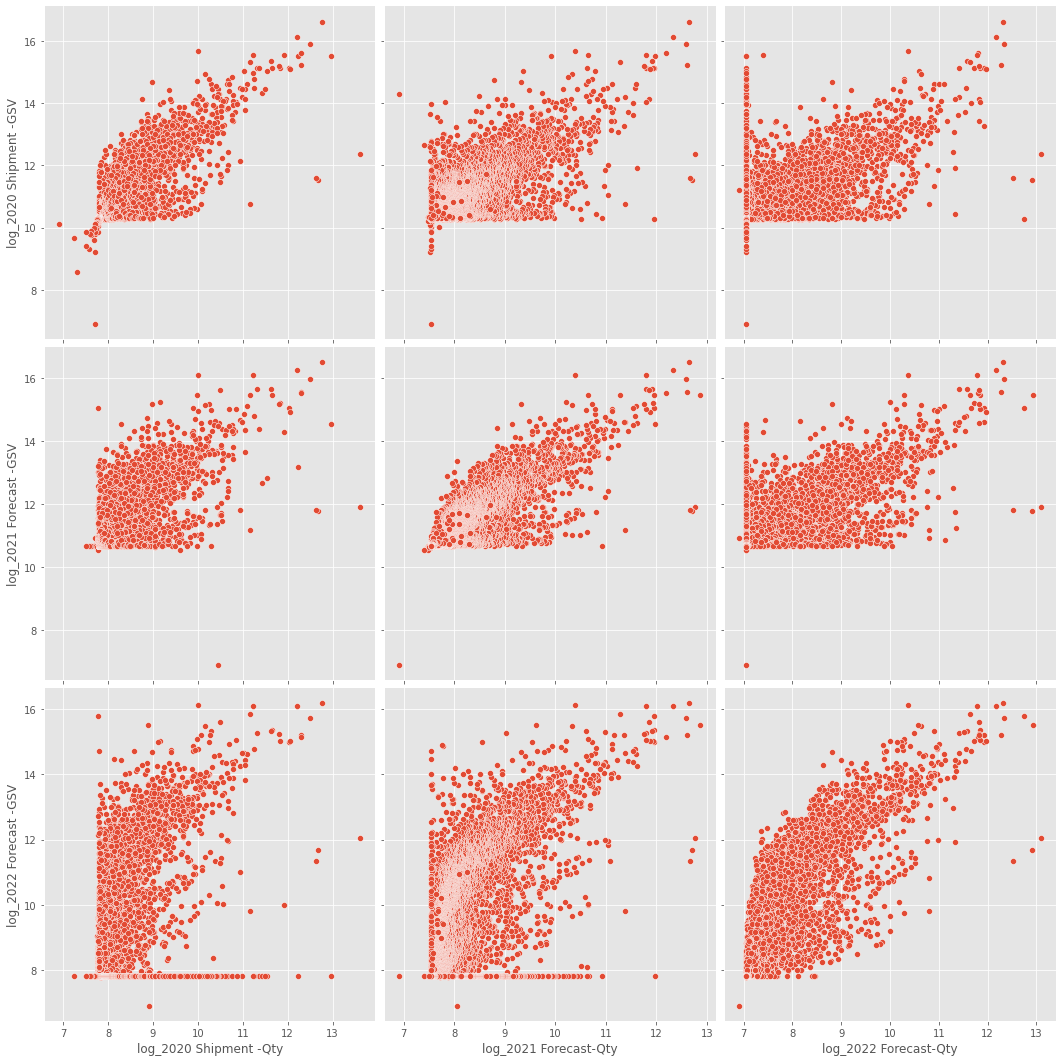

In [335]:
sns.pairplot(df, x_vars = ["log_2020 Shipment -Qty", "log_2021 Forecast-Qty", "log_2022 Forecast-Qty"],
             y_vars = ["log_2020 Shipment -GSV",  "log_2021 Forecast -GSV", "log_2022 Forecast -GSV"], height = 5)

The above plot shows that there exists a postive relationship between the Shipment Qty and Shipment GSV and regression models can be fit to predict the shipment value

### 2.4 Regional Analysis and Vendor Analysis

In [621]:
def catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint = False):
    if analysisCat in cols:
        cols.remove(analysisCat)
    
    x = colPair[0]
    y = colPair[1]
    
    totalXCol = df[x].sum()
    totalAnlaysisCol = df[analysisCol].sum()
    print(f"Total {analysisCol} is observed at: {totalAnlaysisCol} \n")

    dfCat = pd.DataFrame(df.groupby([analysisCat])[[x, y]].sum().\
                            sort_values(by = analysisCol, ascending = False))

    dfCat.reset_index(inplace = True)
    print(f"############## TOP {analysisCat} ##############")
    print(f"Top {analysisCat} in terms of {analysisCol} are: \n")
    display(dfCat.loc[0:2])
    topCat = dfCat.loc[0:2,analysisCat]
    for i in range(len(topCat)):
        CatAnalysisSum = dfCat.loc[i, analysisCol]
        CatXSum = dfCat.loc[i, x]
        Cat = topCat[i]
        print(f"\n########### Insights for {analysisCat} {Cat} ###########\n")
        print(f"""{analysisCat} {Cat} has contribution of {(CatAnalysisSum/totalAnlaysisCol)*100:.3f} % in total {y} which further 
        contributes {(CatXSum/totalXCol)*100:.3f} % in {x}. \n""")

        for col in cols:
            dfTopCat = df.loc[df[analysisCat] == Cat].groupby([col])[[x,y]].sum().sort_values(by = y, ascending = False)
            dfTopCat = dfTopCat.reset_index().loc[:2]
            dfTopCat[f"{x} %age {Cat}"] = dfTopCat[x]/CatXSum*100
            dfTopCat[f"{y} %age {Cat}"] = dfTopCat[y]/CatAnalysisSum*100
            if tablesPrint == True:
                display(dfTopCat)
            print(f"{col} - {dfTopCat.loc[0, col]} contributes highest in {analysisCol} for {analysisCat} {Cat} at {dfTopCat.loc[0, analysisCol]/CatAnalysisSum*100:.3f} %. \n")
            

def catAnalysisMean(analysisCat, cols, colPair, analysisCol, tablesPrint = False):
    if analysisCat in cols:
        cols.remove(analysisCat)
    
    x = colPair[0]
    y = colPair[1]
    
    totalXCol = df[x].mean()
    totalAnlaysisCol = df[analysisCol].mean()
    print(f"Overall average {analysisCol} is observed at: {totalAnlaysisCol} \n")

    dfCat = pd.DataFrame(df.groupby([analysisCat])[[x, y]].mean().\
                            sort_values(by = analysisCol, ascending = False))

    dfCat.reset_index(inplace = True)
    print(f"############## TOP {analysisCat} ##############")
    print(f"Top {analysisCat} in terms of average  {analysisCol} are: \n")
    display(dfCat.loc[0:2])
    topCat = dfCat.loc[0:2,analysisCat]
    for i in range(len(topCat)):
        CatAnalysismean = dfCat.loc[i, analysisCol]
        CatXmean = dfCat.loc[i, x]
        Cat = topCat[i]
        print(f"\n########### Analysing Mean for {analysisCat} {Cat} ###########\n")
        print(f"""{analysisCat} {Cat} has average {y} of {CatAnalysismean:.3f} compared to {totalAnlaysisCol:.3f} and corresponding average 
        of {x} for {Cat} is observed at {CatXmean:.3f} compared to total average of {totalXCol:.3f}. \n""")

        for col in cols:
            dfTopCat = df.loc[df[analysisCat] == Cat].groupby([col])[[x,y]].mean().sort_values(by = y, ascending = False)
            dfTopCat = dfTopCat.reset_index().loc[:2]
            if tablesPrint == True:
                display(dfTopCat)
            print(f"{col} - {dfTopCat.loc[0, col]} has the highest average {analysisCol} for {analysisCat} {Cat} at {dfTopCat.loc[0, analysisCol]:.3f}. \n")
            
            
            

In [622]:
analysisCat = 'GIP Region'
cols = ['Demand Group', 'PEAM Code', 'SBU Desc' , 
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']

In [623]:

colPair = ['2020 Shipment -Qty', '2020 Shipment -GSV']

analysisCol = '2020 Shipment -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = True)

Total 2020 Shipment -GSV is observed at: 594895858.98 

############## TOP GIP Region ##############
Top GIP Region in terms of 2020 Shipment -GSV are: 



,GIP Region,2020 Shipment -Qty,2020 Shipment -GSV
0,USA,"7,361,900.00","229,870,807.09"
1,EU,"2,407,970.00","111,739,533.34"
2,LAG,"4,743,374.00","73,259,542.75"



########### Insights for GIP Region USA ###########

GIP Region USA has contribution of 38.641 % in total 2020 Shipment -GSV which further 
        contributes 36.193 % in 2020 Shipment -Qty. 



,Demand Group,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,AMAZON,"2,729,505.00","105,507,861.13",37.08,45.90
1,WALMART,"1,501,658.00","35,130,546.90",20.40,15.28
2,TARGET,"470,349.00","16,965,930.47",6.39,7.38


Demand Group - AMAZON contributes highest in 2020 Shipment -GSV for GIP Region USA at 45.899 %. 



,PEAM Code,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,C,"4,542,175.00","138,287,813.62",61.70,60.16
1,A,"2,284,886.00","77,568,245.58",31.04,33.74
2,D,"186,007.00","7,792,433.13",2.53,3.39


PEAM Code - C contributes highest in 2020 Shipment -GSV for GIP Region USA at 60.159 %. 



,SBU Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,HOME PRODUCTS GROUP,"4,019,766.00","132,510,721.60",54.60,57.65
1,CONS POWER TOOLS,"2,432,671.00","88,457,801.61",33.04,38.48
2,CONSTRUCTION SOLUTIO,"472,341.00","7,380,417.37",6.42,3.21


SBU Desc - HOME PRODUCTS GROUP contributes highest in 2020 Shipment -GSV for GIP Region USA at 57.646 %. 



,SOS Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,SUZHOU CPT,"5,983,650.00","199,506,214.86",81.28,86.79
1,MULTIPLE,"646,953.00","18,661,161.59",8.79,8.12
2,GSMA,"676,991.00","10,533,251.86",9.20,4.58


SOS Desc - SUZHOU CPT contributes highest in 2020 Shipment -GSV for GIP Region USA at 86.791 %. 



,Vendor Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,SUZHOU CPT,"5,983,650.00","199,506,214.86",81.28,86.79
1,MULTIPLE,"646,953.00","18,661,161.59",8.79,8.12
2,GUANG DONG XINBAO EL,"85,097.00","3,662,335.62",1.16,1.59


Vendor Desc - SUZHOU CPT contributes highest in 2020 Shipment -GSV for GIP Region USA at 86.791 %. 



,Category Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,CORDLESS HOME PRODUC,"3,631,937.00","126,886,267.42",49.33,55.20
1,CORDLESS DRILLS,"536,566.00","21,936,011.70",7.29,9.54
2,CORDED SANDERS,"459,008.00","14,282,113.73",6.23,6.21


Category Desc - CORDLESS HOME PRODUC contributes highest in 2020 Shipment -GSV for GIP Region USA at 55.199 %. 



,Division Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,HOME PRODUCTS (HPG),"4,019,766.00","132,510,721.60",54.60,57.65
1,CONSUMER (CPT),"2,432,671.00","88,457,801.61",33.04,38.48
2,PORTABLE STORAGE (CT,"69,943.00","3,081,564.89",0.95,1.34


Division Desc - HOME PRODUCTS (HPG) contributes highest in 2020 Shipment -GSV for GIP Region USA at 57.646 %. 



,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age USA,2020 Shipment -GSV %age USA
0,MPP CORDLESS HAND VA,"1,485,453.00","54,924,425.65",20.18,23.89
1,HPP CORDLESS HAND VA,"696,888.00","37,729,082.74",9.47,16.41
2,EPP CORDLESS HAND VA,"1,327,274.00","25,894,259.27",18.03,11.26


Portfolio Desc - MPP CORDLESS HAND VA contributes highest in 2020 Shipment -GSV for GIP Region USA at 23.894 %. 


########### Insights for GIP Region EU ###########

GIP Region EU has contribution of 18.783 % in total 2020 Shipment -GSV which further 
        contributes 11.838 % in 2020 Shipment -Qty. 



,Demand Group,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,FR-DIY,"240,674.00","14,694,143.18",9.99,13.15
1,IT-OTH,"284,042.00","12,043,124.33",11.80,10.78
2,IB-OTH,"179,784.00","7,892,389.90",7.47,7.06


Demand Group - FR-DIY contributes highest in 2020 Shipment -GSV for GIP Region EU at 13.150 %. 



,PEAM Code,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,C,"1,534,464.00","81,766,385.15",63.72,73.18
1,A,"531,065.00","18,715,335.66",22.05,16.75
2,B,"199,280.00","5,764,980.82",8.28,5.16


PEAM Code - C contributes highest in 2020 Shipment -GSV for GIP Region EU at 73.176 %. 



,SBU Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,CONS POWER TOOLS,"1,270,877.00","69,501,093.90",52.78,62.20
1,HOME PRODUCTS GROUP,"601,772.00","31,132,386.22",24.99,27.86
2,CONSTRUCTION SOLUTIO,"525,559.00","10,613,022.59",21.83,9.50


SBU Desc - CONS POWER TOOLS contributes highest in 2020 Shipment -GSV for GIP Region EU at 62.199 %. 



,SOS Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,SUZHOU CPT,"1,928,193.00","85,989,052.39",80.08,76.95
1,GSMA,"403,232.00","22,666,282.44",16.75,20.28
2,MULTIPLE,"51,362.00","2,464,376.84",2.13,2.21


SOS Desc - SUZHOU CPT contributes highest in 2020 Shipment -GSV for GIP Region EU at 76.955 %. 



,Vendor Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,SUZHOU CPT,"1,928,193.00","85,989,052.39",80.08,76.95
1,VRONGSHENG,"80,669.00","4,892,921.07",3.35,4.38
2,MULTIPLE,"51,362.00","2,464,376.84",2.13,2.21


Vendor Desc - SUZHOU CPT contributes highest in 2020 Shipment -GSV for GIP Region EU at 76.955 %. 



,Category Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,CORDLESS DRILLS,"420,481.00","25,442,366.50",17.46,22.77
1,CORDLESS HOME PRODUC,"362,470.00","24,825,429.38",15.05,22.22
2,CORDLESS COMBO KITS,"210,140.00","15,024,038.14",8.73,13.45


Category Desc - CORDLESS DRILLS contributes highest in 2020 Shipment -GSV for GIP Region EU at 22.769 %. 



,Division Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,CONSUMER (CPT),"1,258,059.00","67,838,510.63",52.25,60.71
1,HOME PRODUCTS (HPG),"601,772.00","31,132,386.22",24.99,27.86
2,PORTABLE STORAGE (CT,"116,022.00","5,668,276.87",4.82,5.07


Division Desc - CONSUMER (CPT) contributes highest in 2020 Shipment -GSV for GIP Region EU at 60.711 %. 



,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age EU,2020 Shipment -GSV %age EU
0,CORDLESS COMBO KITS,"210,140.00","15,024,038.14",8.73,13.45
1,CDLS HAMMER DRILLS,"210,941.00","13,048,646.81",8.76,11.68
2,CDLS DRILLS,"192,995.00","10,253,495.53",8.01,9.18


Portfolio Desc - CORDLESS COMBO KITS contributes highest in 2020 Shipment -GSV for GIP Region EU at 13.446 %. 


########### Insights for GIP Region LAG ###########

GIP Region LAG has contribution of 12.315 % in total 2020 Shipment -GSV which further 
        contributes 23.320 % in 2020 Shipment -Qty. 



,Demand Group,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,CHSODIMAC,"220,912.00","6,443,114.57",4.66,8.79
1,MXHD,"250,376.00","4,818,450.43",5.28,6.58
2,CHMDR,"144,673.00","4,272,335.89",3.05,5.83


Demand Group - CHSODIMAC contributes highest in 2020 Shipment -GSV for GIP Region LAG at 8.795 %. 



,PEAM Code,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,C,"1,643,203.00","42,884,453.90",34.64,58.54
1,A,"2,648,384.00","23,290,444.58",55.83,31.79
2,D,"104,792.00","4,048,413.96",2.21,5.53


PEAM Code - C contributes highest in 2020 Shipment -GSV for GIP Region LAG at 58.538 %. 



,SBU Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,CONS POWER TOOLS,"2,389,565.00","67,935,011.90",50.38,92.73
1,CONSTRUCTION SOLUTIO,"279,068.00","1,696,561.68",5.88,2.32
2,HOME PRODUCTS GROUP,"43,786.00","1,261,570.52",0.92,1.72


SBU Desc - CONS POWER TOOLS contributes highest in 2020 Shipment -GSV for GIP Region LAG at 92.732 %. 



,SOS Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,GSMA,"3,660,148.00","42,281,593.55",77.16,57.71
1,SUZHOU CPT,"587,014.00","19,448,137.14",12.38,26.55
2,MULTIPLE,"464,751.00","10,230,654.92",9.80,13.96


SOS Desc - GSMA contributes highest in 2020 Shipment -GSV for GIP Region LAG at 57.715 %. 



,Vendor Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,SUZHOU CPT,"587,014.00","19,448,137.14",12.38,26.55
1,ZHEJIANG HUAFENG ELE,"588,123.00","12,859,374.41",12.40,17.55
2,MULTIPLE,"464,751.00","10,230,654.92",9.80,13.96


Vendor Desc - SUZHOU CPT contributes highest in 2020 Shipment -GSV for GIP Region LAG at 26.547 %. 



,Category Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,CORDED GRINDER,"868,578.00","19,068,313.62",18.31,26.03
1,CORDED SAWS,"250,009.00","8,597,065.92",5.27,11.74
2,CORDLESS DRILLS,"272,797.00","8,430,731.82",5.75,11.51


Category Desc - CORDED GRINDER contributes highest in 2020 Shipment -GSV for GIP Region LAG at 26.028 %. 



,Division Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,CONSUMER (CPT),"2,320,344.00","63,604,528.17",48.92,86.82
1,AUTO & ELEC (CPT),"50,394.00","3,301,621.48",1.06,4.51
2,HOME PRODUCTS (HPG),"43,786.00","1,261,570.52",0.92,1.72


Division Desc - CONSUMER (CPT) contributes highest in 2020 Shipment -GSV for GIP Region LAG at 86.821 %. 



,Portfolio Desc,2020 Shipment -Qty,2020 Shipment -GSV,2020 Shipment -Qty %age LAG,2020 Shipment -GSV %age LAG
0,GRINDERS,"868,578.00","19,068,313.62",18.31,26.03
1,HAMMER DRILLS,"301,971.00","8,074,387.08",6.37,11.02
2,CDLS DRILLS,"240,463.00","6,720,788.30",5.07,9.17


Portfolio Desc - GRINDERS contributes highest in 2020 Shipment -GSV for GIP Region LAG at 26.028 %. 



In [587]:
colPair = ['2021 Forecast-Qty', '2021 Forecast -GSV']

analysisCol = '2021 Forecast -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Total 2021 Forecast -GSV is observed at: 809015206.93 

############## TOP GIP Region ##############
Top GIP Region in terms of 2021 Forecast -GSV are: 



,GIP Region,2021 Forecast-Qty,2021 Forecast -GSV
0,USA,"9,070,440.00","303,978,682.03"
1,EU,"3,318,421.00","158,676,358.08"
2,LAG,"6,244,620.00","129,820,681.72"



########### Analysis for GIP Region USA ###########

GIP Region USA has contribution of 37.574 % in total 2021 Forecast -GSV which further 
        contributes 35.622 % in 2021 Forecast-Qty. 

Demand Group - AMAZON contributes highest in 2021 Forecast -GSV for GIP Region USA at 48.307 %. 

PEAM Code - C contributes highest in 2021 Forecast -GSV for GIP Region USA at 62.403 %. 

SBU Desc - HOME PRODUCTS GROUP contributes highest in 2021 Forecast -GSV for GIP Region USA at 55.483 %. 

SOS Desc - SUZHOU CPT contributes highest in 2021 Forecast -GSV for GIP Region USA at 86.219 %. 

Vendor Desc - SUZHOU CPT contributes highest in 2021 Forecast -GSV for GIP Region USA at 86.219 %. 

Category Desc - CORDLESS HOME PRODUC contributes highest in 2021 Forecast -GSV for GIP Region USA at 52.857 %. 

Division Desc - HOME PRODUCTS (HPG) contributes highest in 2021 Forecast -GSV for GIP Region USA at 55.483 %. 

Portfolio Desc - MPP CORDLESS HAND VA contributes highest in 2021 Forecast -GSV for GIP

In [628]:
colPair = ['2022 Forecast-Qty', '2022 Forecast -GSV']

analysisCol = '2022 Forecast -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Total 2022 Forecast -GSV is observed at: 722137131.1699998 

############## TOP GIP Region ##############
Top GIP Region in terms of 2022 Forecast -GSV are: 



,GIP Region,2022 Forecast-Qty,2022 Forecast -GSV
0,USA,"8,606,960.00","285,932,268.04"
1,EU,"3,230,896.00","156,672,010.60"
2,LAG,"5,983,815.00","109,222,141.73"



########### Insights for GIP Region USA ###########

GIP Region USA has contribution of 39.595 % in total 2022 Forecast -GSV which further 
        contributes 37.457 % in 2022 Forecast-Qty. 

Demand Group - AMAZON contributes highest in 2022 Forecast -GSV for GIP Region USA at 51.569 %. 

PEAM Code - C contributes highest in 2022 Forecast -GSV for GIP Region USA at 59.409 %. 

SBU Desc - HOME PRODUCTS GROUP contributes highest in 2022 Forecast -GSV for GIP Region USA at 52.773 %. 

SOS Desc - SUZHOU CPT contributes highest in 2022 Forecast -GSV for GIP Region USA at 86.029 %. 

Vendor Desc - SUZHOU CPT contributes highest in 2022 Forecast -GSV for GIP Region USA at 86.029 %. 

Category Desc - CORDLESS HOME PRODUC contributes highest in 2022 Forecast -GSV for GIP Region USA at 49.930 %. 

Division Desc - HOME PRODUCTS (HPG) contributes highest in 2022 Forecast -GSV for GIP Region USA at 52.773 %. 

Portfolio Desc - MPP CORDLESS HAND VA contributes highest in 2022 Forecast -GSV for GIP

In [629]:
analysisCat = 'GIP Region'
cols = ['Demand Group', 'PEAM Code', 'SBU Desc' , 
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']
colPair = ['2022 Forecast-Qty', '2022 Forecast -GSV']

analysisCol = '2022 Forecast -GSV'
catAnalysisMean(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Overall average 2022 Forecast -GSV is observed at: 38293.4102858203 

############## TOP GIP Region ##############
Top GIP Region in terms of average  2022 Forecast -GSV are: 



,GIP Region,2022 Forecast-Qty,2022 Forecast -GSV
0,USA-FOB,"11,553.95","269,165.99"
1,USA,"2,496.94","82,951.05"
2,ANZ,915.47,"56,208.71"



########### Analysing Mean for GIP Region USA-FOB ###########

GIP Region USA-FOB has average 2022 Forecast -GSV of 269165.987 compared to 38293.410 and corresponding average 
        of 2022 Forecast-Qty for USA-FOB is observed at 11553.946 compared to total average of 1218.480. 

Demand Group - LOWESFOB has the highest average 2022 Forecast -GSV for GIP Region USA-FOB at 709996.179. 

PEAM Code - C has the highest average 2022 Forecast -GSV for GIP Region USA-FOB at 292915.927. 

SBU Desc - CONS POWER TOOLS has the highest average 2022 Forecast -GSV for GIP Region USA-FOB at 343418.673. 

SOS Desc - MULTIPLE has the highest average 2022 Forecast -GSV for GIP Region USA-FOB at 2221822.170. 

Vendor Desc - MULTIPLE has the highest average 2022 Forecast -GSV for GIP Region USA-FOB at 2221822.170. 

Category Desc - CORDED SANDERS has the highest average 2022 Forecast -GSV for GIP Region USA-FOB at 3332733.255. 

Division Desc - CONSUMER (CPT) has the highest average 2022 Forecast -GSV f

In [631]:
analysisCat = 'Vendor Desc'
cols = ['GIP Region', 'PEAM Code', 'SBU Desc' , 'Demand Group',
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']
colPair = ['2020 Shipment -Qty', '2020 Shipment -GSV']

analysisCol = '2020 Shipment -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Total 2020 Shipment -GSV is observed at: 594895858.98 

############## TOP Vendor Desc ##############
Top Vendor Desc in terms of 2020 Shipment -GSV are: 



,Vendor Desc,2020 Shipment -Qty,2020 Shipment -GSV
0,SUZHOU CPT,"10,984,514.00","392,202,853.97"
1,MULTIPLE,"1,817,750.00","44,786,879.75"
2,ZHEJIANG HUAFENG ELE,"726,181.00","17,986,916.09"



########### Insights for Vendor Desc SUZHOU CPT ###########

Vendor Desc SUZHOU CPT has contribution of 65.928 % in total 2020 Shipment -GSV which further 
        contributes 54.003 % in 2020 Shipment -Qty. 

GIP Region - USA contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 50.868 %. 

PEAM Code - C contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 71.872 %. 

SBU Desc - CONS POWER TOOLS contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 48.755 %. 

Demand Group - AMAZON contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 24.209 %. 

SOS Desc - SUZHOU CPT contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 100.000 %. 

Category Desc - CORDLESS HOME PRODUC contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 44.316 %. 

Division Desc - HOME PRODUCTS (HPG) contributes highest in 2020 Shipment -GSV for Vendor Desc SUZHOU CPT at 48.290 %. 

Portfolio Desc - MPP COR

In [630]:
analysisCat = 'Vendor Desc'
cols = ['GIP Region', 'PEAM Code', 'SBU Desc' , 'Demand Group',
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']
colPair = ['2021 Forecast-Qty', '2021 Forecast -GSV']

analysisCol = '2021 Forecast -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Total 2021 Forecast -GSV is observed at: 809015206.93 

############## TOP Vendor Desc ##############
Top Vendor Desc in terms of 2021 Forecast -GSV are: 



,Vendor Desc,2021 Forecast-Qty,2021 Forecast -GSV
0,SUZHOU CPT,"13,212,276.00","511,274,254.93"
1,MULTIPLE,"2,544,423.00","55,755,034.47"
2,ZHEJIANG HUAFENG ELE,"1,074,091.00","31,805,742.65"



########### Insights for Vendor Desc SUZHOU CPT ###########

Vendor Desc SUZHOU CPT has contribution of 63.197 % in total 2021 Forecast -GSV which further 
        contributes 51.888 % in 2021 Forecast-Qty. 

GIP Region - USA contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 51.262 %. 

PEAM Code - C contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 73.532 %. 

SBU Desc - CONS POWER TOOLS contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 48.938 %. 

Demand Group - AMAZON contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 24.535 %. 

SOS Desc - SUZHOU CPT contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 100.000 %. 

Category Desc - CORDLESS HOME PRODUC contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 44.157 %. 

Division Desc - HOME PRODUCTS (HPG) contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 48.158 %. 

Portfolio Desc - MPP CORD

In [589]:
analysisCat = 'Vendor Desc'
cols = ['GIP Region', 'PEAM Code', 'SBU Desc' , 'Demand Group',
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']
colPair = ['2022 Forecast-Qty', '2022 Forecast -GSV']

analysisCol = '2022 Forecast -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Total 2022 Forecast -GSV is observed at: 722137131.1699998 

############## TOP Vendor Desc ##############
Top Vendor Desc in terms of 2022 Forecast -GSV are: 



,Vendor Desc,2022 Forecast-Qty,2022 Forecast -GSV
0,SUZHOU CPT,"12,087,164.00","468,313,882.55"
1,MULTIPLE,"2,431,114.00","52,036,391.05"
2,ZHEJIANG HUAFENG ELE,"986,266.00","32,539,905.58"



########### Analysis for Vendor Desc SUZHOU CPT ###########

Vendor Desc SUZHOU CPT has contribution of 64.851 % in total 2022 Forecast -GSV which further 
        contributes 52.603 % in 2022 Forecast-Qty. 

GIP Region - USA contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 52.525 %. 

PEAM Code - C contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 72.494 %. 

SBU Desc - CONS POWER TOOLS contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 49.466 %. 

Demand Group - AMAZON contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 27.098 %. 

SOS Desc - SUZHOU CPT contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 100.000 %. 

Category Desc - CORDLESS HOME PRODUC contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 43.495 %. 

Division Desc - CONSUMER (CPT) contributes highest in 2022 Forecast -GSV for Vendor Desc SUZHOU CPT at 48.450 %. 

Portfolio Desc - MPP CORDLESS 

In [619]:
analysisCat = 'Vendor Desc'
cols = ['GIP Region', 'PEAM Code', 'SBU Desc' , 'Demand Group',
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']
colPair = ['2021 Forecast-Qty', '2021 Forecast -GSV']

analysisCol = '2021 Forecast -GSV'
catAnalysisTotal(analysisCat, cols, colPair, analysisCol, tablesPrint  = False)

Total 2021 Forecast -GSV is observed at: 809015206.93 

############## TOP Vendor Desc ##############
Top Vendor Desc in terms of 2021 Forecast -GSV are: 



,Vendor Desc,2021 Forecast-Qty,2021 Forecast -GSV
0,SUZHOU CPT,"13,212,276.00","511,274,254.93"
1,MULTIPLE,"2,544,423.00","55,755,034.47"
2,ZHEJIANG HUAFENG ELE,"1,074,091.00","31,805,742.65"



########### Analysis for Vendor Desc SUZHOU CPT ###########

Vendor Desc SUZHOU CPT has contribution of 63.197 % in total 2021 Forecast -GSV which further 
        contributes 51.888 % in 2021 Forecast-Qty. 

GIP Region - USA contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 51.262 %. 

PEAM Code - C contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 73.532 %. 

SBU Desc - CONS POWER TOOLS contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 48.938 %. 

Demand Group - AMAZON contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 24.535 %. 

SOS Desc - SUZHOU CPT contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 100.000 %. 

Category Desc - CORDLESS HOME PRODUC contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 44.157 %. 

Division Desc - HOME PRODUCTS (HPG) contributes highest in 2021 Forecast -GSV for Vendor Desc SUZHOU CPT at 48.158 %. 

Portfolio Desc - MPP CORD

## 3.0 Analysing missing data

In [363]:
df2022Nan.columns

Index(['GIP Region', 'Region Desc', 'Sales Organization',
       'Sales Organisation Desc', 'Dmd - Global Region', 'Demand Group',
       'Global Material', 'Material Desc', 'PMAN ABC Code', 'PEAM ABC Code',
       'PEAM Code', 'GPP SBU', 'SBU Desc', 'GLB Source of Supply', 'SOS Desc',
       'GLB Preferred Vendor', 'Vendor Desc', 'GPP Category', 'Category Desc',
       'GPP Division', 'Division Desc', 'GPP Portfolio', 'Portfolio Desc',
       '2020 Shipment -Qty', '2020 Shipment -GSV', '2021 Forecast-Qty',
       '2021 Forecast -GSV', '2022 Forecast-Qty', '2022 Forecast -GSV',
       'log_2020 Shipment -Qty', 'log_2020 Shipment -GSV',
       'log_2021 Forecast-Qty', 'log_2021 Forecast -GSV',
       'log_2022 Forecast-Qty', 'log_2022 Forecast -GSV'],
      dtype='object')


########## Frequency Distribution of GIP Region ##########



,GIP Region,Frequency,%age
0,USA,337,0.57
1,LAG,177,0.30
2,CDN,70,0.12
3,EU,4,0.01
4,ANZ,1,0.00
5,GPA,1,0.00
6,EMG,1,0.00


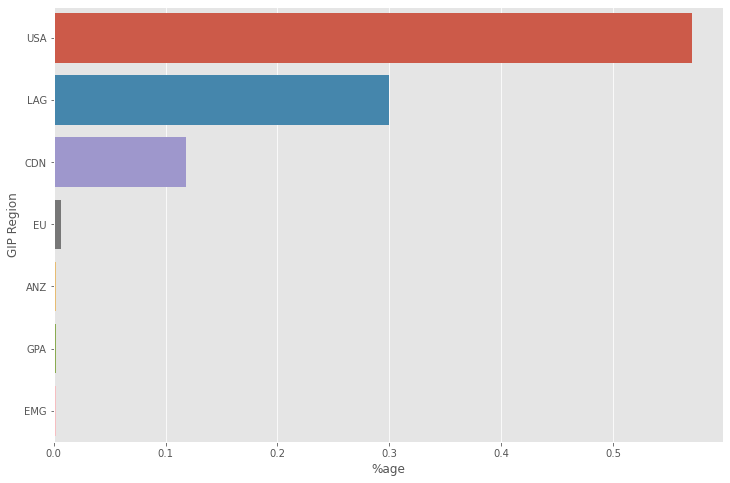


########## Frequency Distribution of PEAM Code ##########



,PEAM Code,Frequency,%age
0,C,330,0.56
1,B,108,0.18
2,A,108,0.18
3,D,45,0.08


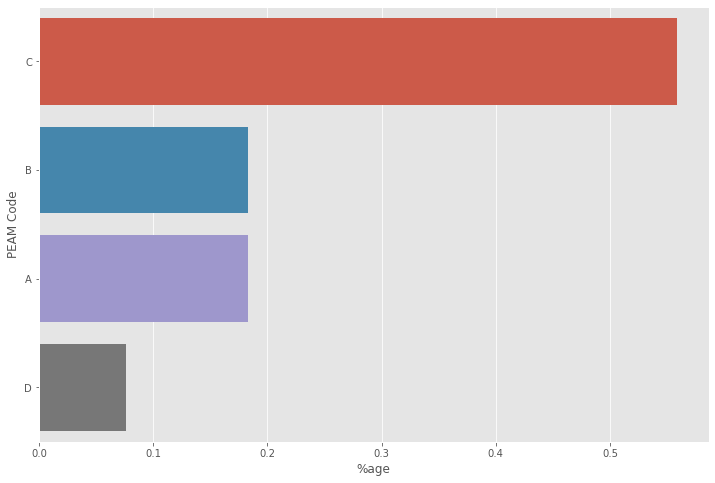


########## Frequency Distribution of SBU Desc ##########



,SBU Desc,Frequency,%age
0,CONS POWER TOOLS,235,0.40
1,HOME PRODUCTS GROUP,138,0.23
2,CONSTRUCTION SOLUTIO,114,0.19
3,INDUSTRIAL SOLUTIONS,91,0.15
4,AUTOMOTIVE & INDUSTR,13,0.02


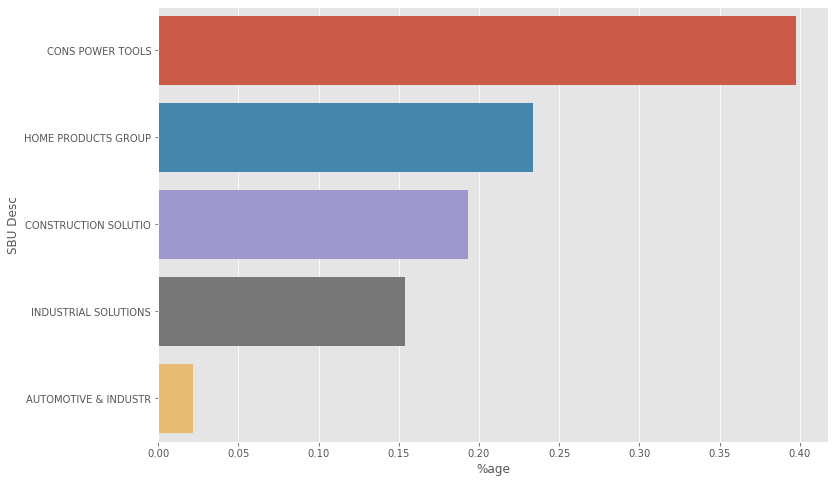


########## Frequency Distribution for TOP 20 Category of Demand Group ##########



,Demand Group,Frequency,%age
0,FACTSTORES,35,0.06
1,NAPTOTHER,31,0.05
2,WALMART,28,0.05
3,RW,26,0.04
4,AMAZON,25,0.04
5,ECOMM,23,0.04
6,LOWES,22,0.04
7,SERVCTR,22,0.04
8,CPO,22,0.04
9,CDNWAL,21,0.04


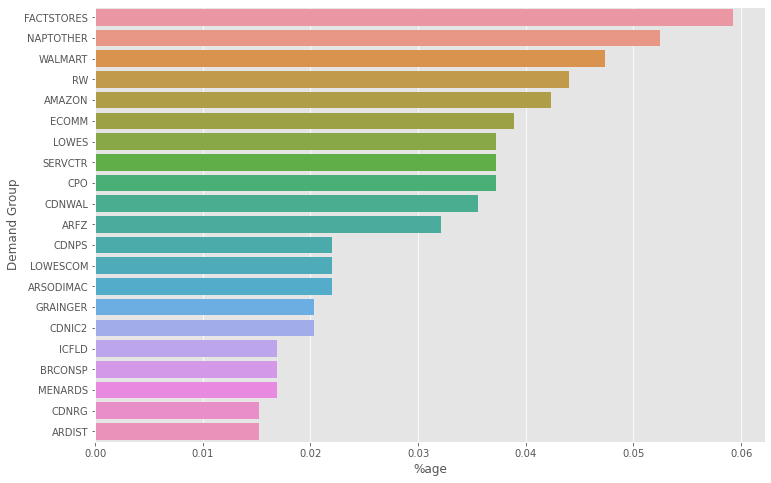


########## Frequency Distribution of SOS Desc ##########



,SOS Desc,Frequency,%age
0,SUZHOU CPT,328,0.55
1,GSMA,187,0.32
2,NO_SOURCE,56,0.09
3,MULTIPLE,11,0.02
4,SHELBYVILLE,3,0.01
5,DC_KITTING,2,0.00
6,PURCHASED,2,0.00
7,SHENZHEN,1,0.00
8,ST-HYACINTHE MFG,1,0.00


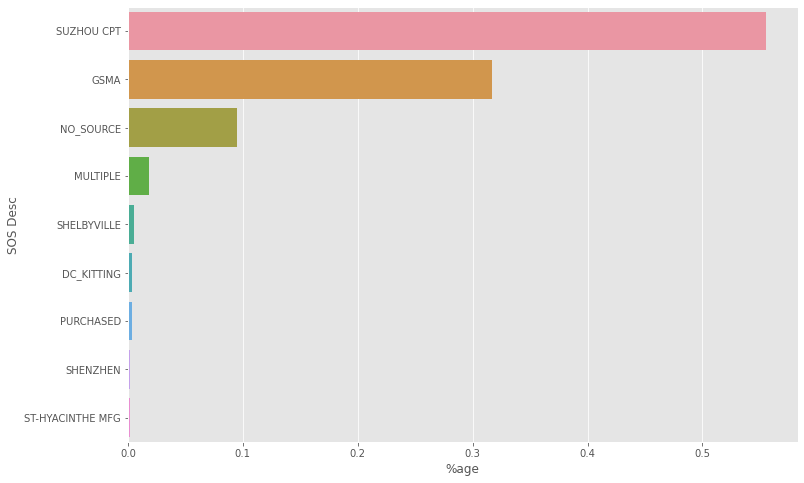


########## Frequency Distribution for TOP 20 Category of Vendor Desc ##########



,Vendor Desc,Frequency,%age
0,SUZHOU CPT,328,0.55
1,NO_SOURCE,56,0.09
2,VSUNCRAFT,17,0.03
3,ZHEJIANG YIDA ELECTR,15,0.03
4,VGUEX,15,0.03
5,JINDING GROUP CO LTD,11,0.02
6,MULTIPLE,11,0.02
7,GUANG DONG XINBAO EL,10,0.02
8,VCUMET,9,0.02
9,JIANGSU FENGTAI TOOL,8,0.01


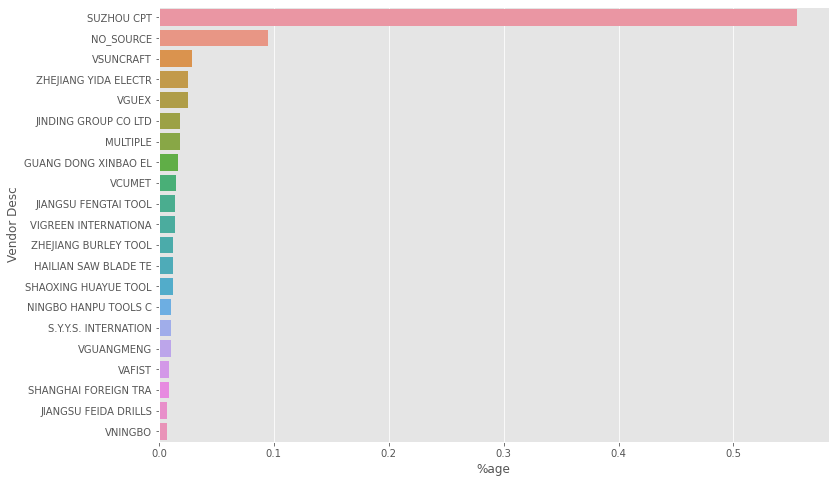


########## Frequency Distribution for TOP 20 Category of Category Desc ##########



,Category Desc,Frequency,%age
0,CORDLESS HOME PRODUC,99,0.17
1,FASTENING,67,0.11
2,METAL DRILLING,45,0.08
3,CORDED DRILLS,34,0.06
4,CORDLESS DRILLS,33,0.06
5,SPECIALTY,29,0.05
6,ABRASIVES,25,0.04
7,CORDLESS SCREWDRIVER,24,0.04
8,LINEAR EDGE,23,0.04
9,BATTERIES & CHARGERS,22,0.04


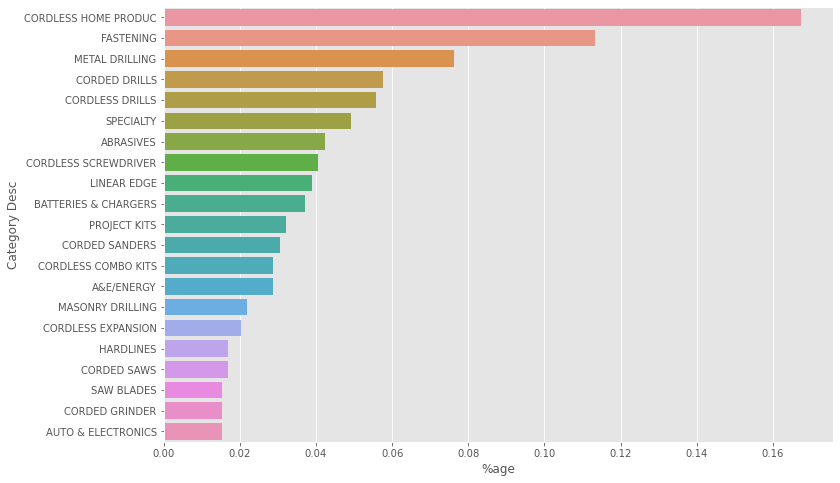


########## Frequency Distribution of Division Desc ##########



,Division Desc,Frequency,%age
0,CONSUMER (CPT),225,0.38
1,HOME PRODUCTS (HPG),138,0.23
2,CONSTRUCTION ACCESSO,109,0.18
3,COMMERCIAL ACCESSORI,91,0.15
4,MECH& AUTO TOOLS (AI,13,0.02
5,AUTO & ELEC (CPT),9,0.02
6,PORTABLE STORAGE (CT,3,0.01
7,HAND TOOLS (CTS),2,0.00
8,TRADESMAN (CPT),1,0.00


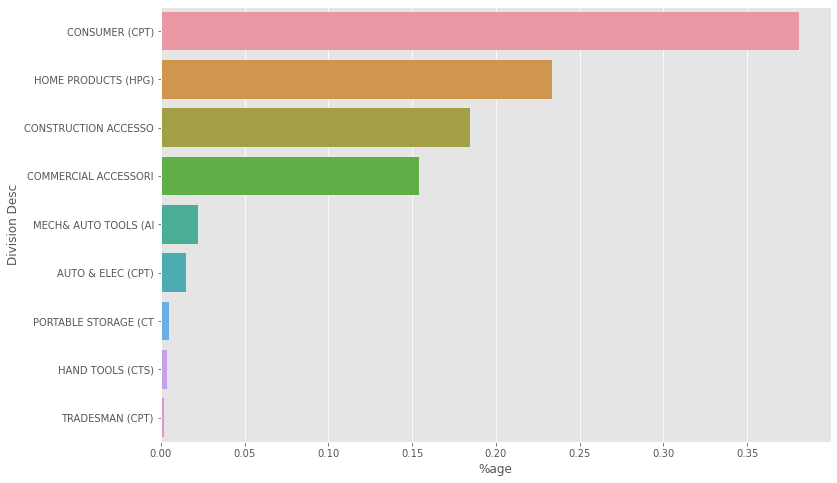


########## Frequency Distribution for TOP 20 Category of Portfolio Desc ##########



,Portfolio Desc,Frequency,%age
0,ROUND SHANK METAL DR,45,0.08
1,COMBINATION SETS,42,0.07
2,CDLS DRILLS,30,0.05
3,HAMMER DRILLS,27,0.05
4,HPP CORDLESS HAND VA,26,0.04
5,STD.CDLS.SCREWDRIVRS,24,0.04
6,MPP CORDLESS STICK V,22,0.04
7,BATTERIES & CHARGERS,22,0.04
8,MPP CORDLESS HAND VA,17,0.03
9,CORDLESS COMBO KITS,17,0.03


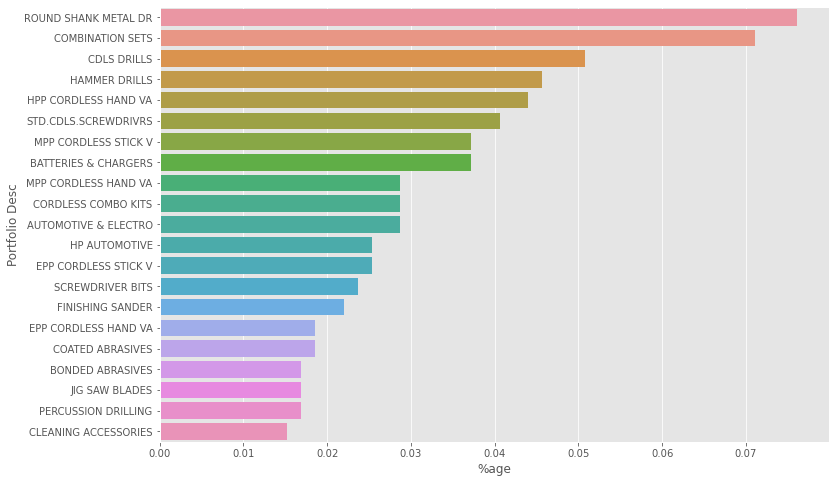

In [633]:
# Lets start analysing the missing data for 2022 as it has lowest percentage of missing values.
df2022Nan = df[df['2022 Forecast -GSV'].isnull()]

cols = ['GIP Region', 'PEAM Code', 'SBU Desc' , 'Demand Group',
        'SOS Desc', 'Vendor Desc', 'Category Desc', 'Division Desc',
       'Portfolio Desc']
for col in cols:
    freqDist(df2022Nan, col, drop = False)


The above distribution analysis demonstrated that majority of the missing values for year 2022 is majorly for USA Region with PEAM Code category of C, for vendor SUZHOU CPT. Therefore, it will not be appropriate to find the missing value using simple imputers which take whole data into consideration. And, as observed early majority of the data belongs to EU region. Therfore, it is necessary to understand the distribution of other features for imputing missing values. The approach such as weighted average can be considered using proportion of region and other features as weights. Moreover, other appraoches such as regressions, KNN Imputer can also be utilised to evaluate missing data.

### Key Insights

The initial analysis demonstrated that the dataset consists of 19449 rows and 29 columns. All the columns are categorical except for the variables related to Shipment Qty and Shipment GSV for the years 2020, 2021, and 2022. It is also observed that for the year 2020, the proportion of missing values in the given data is observed at 25.287 percent for both Qty and GSV. Similarly, the missing value proportions for the years 2021 and 2022 are estimated at 33.889% and 3.039% respectively for both Qty and GSV. The missing values can be imputed using simple imputers such as mean, median, and mode. However, the proportion of missing values is large and simple imputations based on overall data can reduce the accuracy of the analysis. Therefore, before formulating any strategy to impute missing data it is necessary to understand the distribution of different categorical features associated with missing values. Therefore, imputation of missing data requires a more sophisticated approach such as weighted average, linear modelling or KNN Imputation.  However, the existing dataset without missing values can also provide significant insights. 
The distribution analysis of categorical data, after ignoring the missing values for quantitative variables, demonstrated that the data mostly comprised of observations from the EU region (30%) followed by Latin America (25) and the USA (10%). In terms of the Sales organisation, nearly 65% of the data is from EMEA (European, Middle Eastern and African) region, followed by the US at 15 percent. Furthermore, nearly 76 % percent of data is for Consumer Power Tools and Home Products Group SBU, and the majority of the data is related to Suzhou CPT Vendor. The summary statistics for quantitative features of Quantity and GSV demonstrated that there exist significant outliers in the data given the difference between maximum values of quantitative features and 75th percentile value. Therefore, natural log transformation is also done to reduce the variability in data as well as to introduce symmetry. 
The top 10 analysis for shipment quantity demonstrated that in the year 2020, the highest shipment quantity was recorded by Latin America for PMAN ABC Code A which belonged to Commercial Accessory Division under Industrial Solutions SBU. This shipment contributed nearly 16.377 % to overall shipment quantity in 2020 and was worth 9.377% of Gross Shipment Value in 2020.  Overall, it is observed that 70 percent of the top 10 shipment orders (quantity) are from the USA which contributes 99.366% in GSV for Top 10 Shipment orders. Moreover, these products are majorly associated with PEAM Code A and come under SBU of Home Products Group. Most of the shipments are provided by SUZHOU CPT Vendor and come from Walmart Demand Group. It should be noted that the above insight is presented in terms of order volume.  However, considering the GSV (gross value) of the order, the highest order is from the USA region, from the AMAZON demand group with PMAN code of A under HOME Products Group SBU which is completed by Suzhou CPT Vendor. Given, the top 10 orders in terms of shipment value, most of the orders are observed from the USA from the AMAZON demand group. The products usually lie under PEAM Code C and are under Home Products Group SBU. In 2021, the US remained the main market in terms of top 10 shipment volume as well as value. The products are majorly from Home Products Group and the primary vendor for these orders was again found to be SUZHOU CPT. Top volume orders are mostly observed from WALMART and top value orders are mostly observed from AMAZON. However, unlike 2020, the top volume mostly belongs to the PEAM Code C category in 2021. Findings remain more or less similar for the year 2022, except the most observed demand group under Top 10 analysis for shipment quantity is changed from WALMART to AMAZON and PEAM Code Category is changed from C to A. In terms of shipment value in 2022, the most common PEAM Code category is C and the demand group is again observed to be AMAZON with the same vendor and SBU Category. Moreover, the scatterplots demonstrated the positive relationship between shipment quantity and shipment value (GSV).


#### Regional Analysis and Vendor Analysis in terms of shipment value
The USA has been the most prominent region in terms of Shipment Value. The contribution of the USA in the overall 2020 shipment value was observed at 38.641%. The most prominent demand group in the USA is AMAZON which contributed nearly 45.90% in shipment value for the USA in 2020. PEAM Code C is the highest contributing category for Shipment Value in the USA at 60.16% and vendor SUZHOU CPT contributed 86.79% in the Shipment Value for the USA in 2020. Moreover, it is observed that the contribution of demand group AMAZON has been increasing in Shipment Value in the USA from 45.90% in 2020 to 51.57% in 2022 which is an average growth of nearly 6 percent per annum. Therefore, the share of AMAZON in shipment value for the USA can further increase to 55 percent in 2023. Similar, insights are also presented for the EU region and LAG region. 
The Vendor analysis demonstrated that the SUZHOU CPT has the highest contribution in the shipment value at 64.851 % in 2022. Moreover, AMAZON has the highest contribution in the shipment value generated by SUZHOU CPT. The contribution of AMAZON is estimated at 27.098%. And the USA is the major market for the vendor as the region has contributed by an average of more than 50 percent in the value generated by the vendor in three years. 


Overall, it has been observed that in terms of value, UOverall, it has been observed that in terms of value, the USA has been a major market and the majority of the demand comes from AMAZON for Home Group Products which are catered by SUZHOU CPT Vendor.SA has been a major market and majority of the demand comes from AMAZON for Home Group Products which are catered by SUZHOU CPT Vendor. (In-depth insights are present in the Regional Analysis and Vendor Analysis Section)